# 最大公約数の計算量に関するメモ

## 最大公約数を考えてみよう

- 愚直法
- Euclid 互助法

を作成して，どのくらい時間が測るかをやってみる

In [96]:
# a0 > a1 を仮定しておく
# 必要なら
# if a0 < a1:
#    a0, a1 = a1, a0
# として入れ替える

# 愚直法を考えてみる
def GCD1(a0, a1):
    '''愚直法による最大公約数'''
    gcd = 1
    for m in range(2, a1+1):
        if a0 % m == 0 and a1 % m == 0:
            gcd = m
    return gcd


# 互助法を考えてみる
def GCD2(a0, a1):
    '''互助法による最大公約数'''
    while a1 != 0:
        a0, a1 = a1, a0 % a1
    return a0

In [152]:
# テスト例をいくつか動かしてみる
# 答えのわかっている例で確認することは重要
a0, a1 = 18, 12
print(GCD1(a0, a1), GCD2(a0, a1))

a0, a1 = 1248123442, 646748
print(GCD1(a0, a1), GCD2(a0, a1))

6 6
34 34


In [153]:
# 時間を計測してみる

import timeit
import random


def generate_gcd_pair(order=4):
    '''
    最大公約数ペアを生成
    '''
    # 最大公約数をここで決めておいて
    common = random.randint(10, 20) 

    # あとは適当な倍率をかけて作成
    up_lim = 2**(order+1)
    low_lim = 2**(order)
    k1 = random.randint(low_lim, up_lim)
    k0 = random.randint(low_lim, up_lim)
    if k0 < k1:
        k0, k1 = k1, k0

    a0 = k0 * common
    a1 = k1 * common
    return a0, a1, common


# 時間を測るための，gcd を実行する関数を定義しておく
def test_GCD1():
    a0, a1, common = generate_gcd_pair()
    GCD1(a0, a1)
    

def test_GCD2():
    a0, a1, common = generate_gcd_pair()
    GCD2(a0, a1)


# timeit を使って計測する
gcd1_time = timeit.timeit(test_GCD1, number=1000)
gcd2_time = timeit.timeit(test_GCD2, number=1000)

print(f'GCD1 elapsed time: {gcd1_time:08f} [sec]')
print(f'GCD2 elapsed time: {gcd2_time:08f} [sec]')
print(f'GCD1/GCD2 ratio: {gcd1_time/gcd2_time:08f}')

GCD1 elapsed time: 0.018487 [sec]
GCD2 elapsed time: 0.003218 [sec]
GCD1/GCD2 ratio: 5.745459


## 問題のサイズでどれくらい実行時間が変わるのか？

それでは問題サイズに対してどの程度，実行時間が変わるのかを考えてみる．最大公約数の場合，パラメータは `a0`, `a1` の整数のみ．これらの数値的な大きさが実行時間にどう影響するのかを見てみる．
この大きさをコントロールするために `generate_gcd_pairs()` 関数に `order` という引数を入れている．

In [159]:
# パラメータ付きで `timeit` モジュール関数にデータを渡すには lambda 関数を使えばよいらしい
# 大きさ制御のパラメータを渡すため，`test_GCD1()` と `test_GCD2()` に引数を渡せるように改変

# 大きさ制御パラメータを size としておく
def test_GCD1(size):
    a0, a1, common = generate_gcd_pair(order=size)
    GCD1(a0, a1)
    

def test_GCD2(size):
    a0, a1, common = generate_gcd_pair(order=size)
    GCD2(a0, a1)


gcd1_time = timeit.timeit(lambda: test_GCD1(4), number=1000)
gcd2_time = timeit.timeit(lambda: test_GCD2(4), number=1000)

print(f'GCD1 elapsed time: {gcd1_time:08f} [sec]')
print(f'GCD2 elapsed time: {gcd2_time:08f} [sec]')
print(f'GCD1/GCD2 ratio: {gcd1_time/gcd2_time:08f}')

GCD1 elapsed time: 0.021931 [sec]
GCD2 elapsed time: 0.003782 [sec]
GCD1/GCD2 ratio: 5.798858


In [165]:
# あとはデータ収集してグラフを描く．
# とりあえず pandas のデータフレームに突っ込んでおく

import pandas as pd

data_list = []

for size in range(2, 20):
    gcd1_time = timeit.timeit(lambda: test_GCD1(size), number=100)
    gcd2_time = timeit.timeit(lambda: test_GCD2(size), number=100)
    data_list.append({'size': size, 'GCD1': gcd1_time, 'GCD2': gcd2_time})

df = pd.DataFrame(data_list)
df.head()

,size,GCD1,GCD2
0,2,0.000862,0.000411
1,3,0.001450,0.000420
2,4,0.001946,0.000427
3,5,0.004128,0.000379
4,6,0.007402,0.000380


<Axes: xlabel='size'>

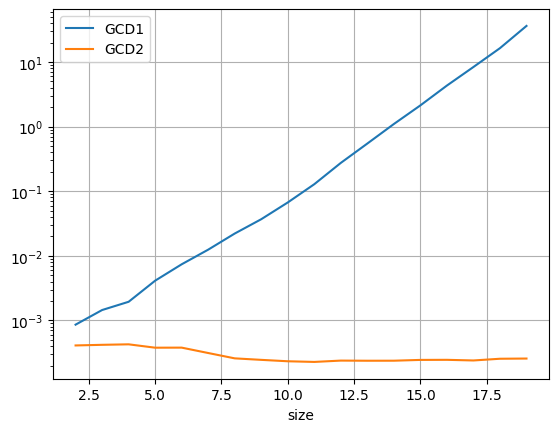

In [167]:
# 片対数グラフで書いてみる
df.plot(x='size', y=['GCD1', 'GCD2'], logy=True, grid=True)

## 結論

- 愚直法，ユークリッド法とも正しい答えを導きだすことはできる
- 実行時間に関しては，与える整数が小さい場合は，それほど問題にならないが，整数サイズが大きくなるに連れ，指数のスケールで性能差が現れてくる．